In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Fetching the Caalifornia housing dataset
housing = fetch_california_housing()

In [3]:
# Create DataFrame with feature data
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add target column
df['MedHouseValue'] = housing.target

# Display first 5 rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

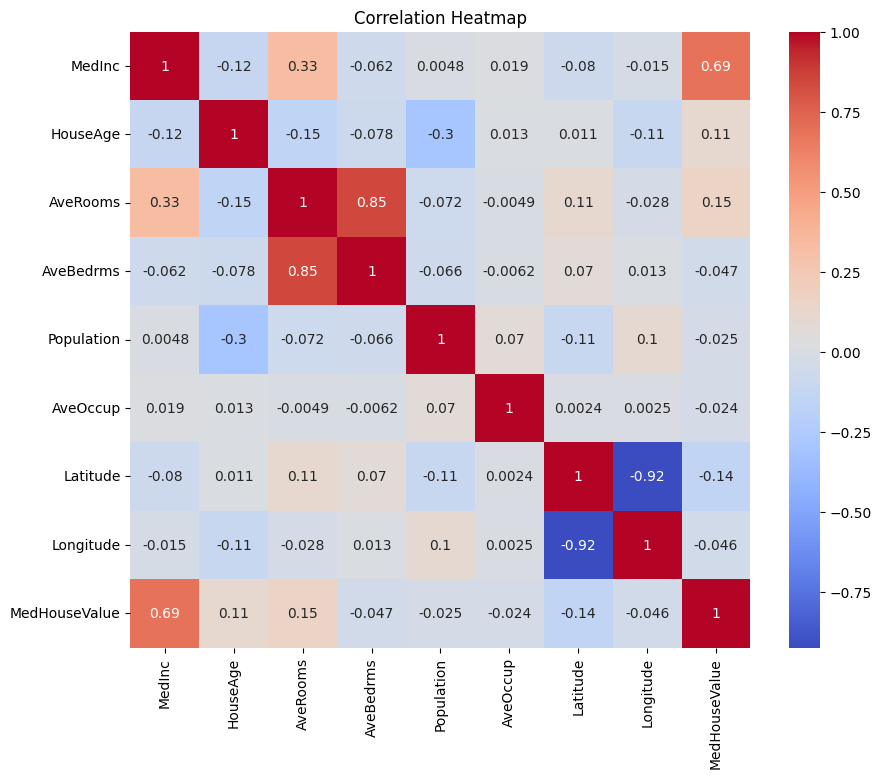

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


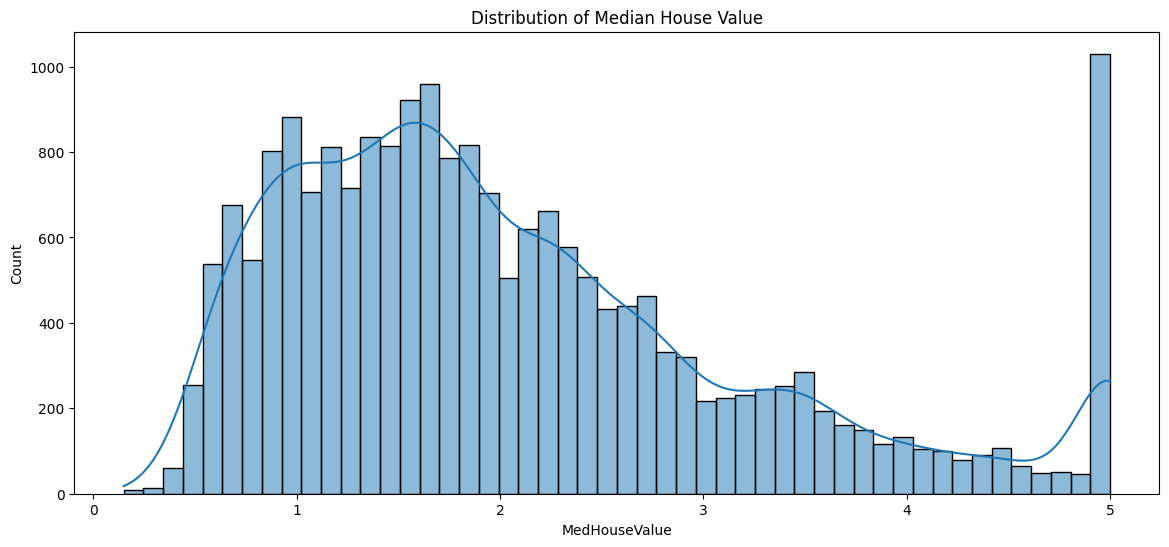

In [12]:
# Distribution plots
plt.figure(figsize=(14, 6))
sns.histplot(df['MedHouseValue'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.show()

In [13]:
# Based on correlation and domain knowledge
selected_features = ['AveRooms', 'AveBedrms', 'AveOccup', 'MedInc']

X = df[selected_features]  # Features
y = df['MedHouseValue']    # Target

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
y_pred = model.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


R² Score: 0.4911
Mean Squared Error: 0.6879


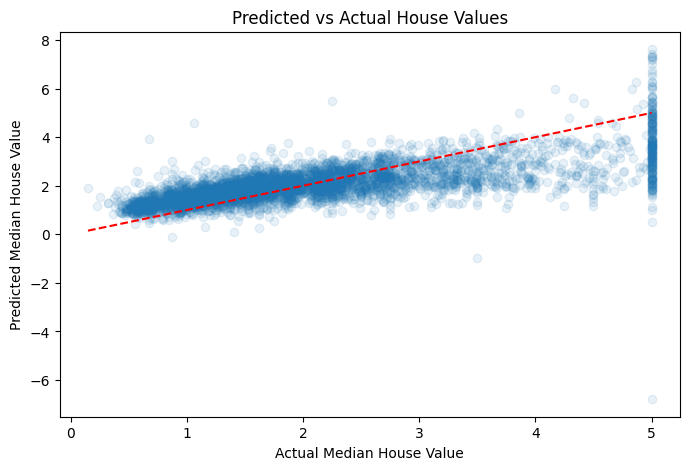

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=.1)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual House Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # correct line
plt.show()


### Model Evaluation & Interpretation

- **R² Score** shows the proportion of variance explained by the model. A value closer to 1 is better.
- **MSE** indicates the average squared difference between actual and predicted values — lower is better.

#### Strengths:
- Simple and interpretable model.
- Fast to train and predict.

#### Weaknesses:
- Assumes a linear relationship between features and target.
- Sensitive to outliers and multicollinearity.

#### Limitations:
- Some features may have non-linear relationships.
- Outliers can skew predictions.
- Consider feature engineering or using more complex models (like tree-based) for better performance.
